In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# convert scientific values
pd.options.display.float_format = '{:,.2f}'.format

# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read the CSV file
data = pd.read_csv("loan.csv")
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
print(data.shape)
print(data.info())
print(data.dtypes)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


## Data Cleaning

In [6]:
# Check rows have all missing values
empty_row = data.isnull().all(axis=1).sum()
print(f'Number of empty Rows: {empty_row}')
# Observation : No empty rows in this dataset


# Check columns with missing value greater than 30%
per_mis_value = round((data.isnull().sum()/data.shape[0])*100,2) # Finding the % of missing value
columns_missing_data = per_mis_value[per_mis_value > 30].index
len_mis_data_col =  len(columns_missing_data)
print(f'Number of empty Columns: {len_mis_data_col}')
# Observation: There are 58 columns which have more than 30% data missing.


Number of empty Rows: 0
Number of empty Columns: 58


In [7]:
# Drop columns with missing values greater than 30%
data = data.drop(columns=columns_missing_data)
print(data.shape)

(39717, 53)


In [8]:
# Display your DataFrame
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


In [9]:
# Remove the unnecessary column
unnes_col_list = ["id", "member_id", "emp_title", "url", "zip_code", "addr_state", "pymnt_plan",
                  "title","initial_list_status", "collections_12_mths_ex_med", "policy_code", 
                  "application_type","acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt", 
                  "pub_rec_bankruptcies", "tax_liens"]
data.drop(unnes_col_list, axis=1, inplace=True)

In [10]:
# Format employment length column to have only numbers.
data.emp_length.fillna('0',inplace=True)
data['emp_length']=data.emp_length.str.extract('(\d+)')
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,10,RENT,"24,000.00",Verified,Dec-11,Fully Paid,credit_card,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,May-16
1,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,1,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,car,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13
2,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,10,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,small_business,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,May-16
3,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,10,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,other,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,Apr-16
4,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,1,RENT,"80,000.00",Source Verified,Dec-11,Current,other,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,May-16


In [11]:
# Remove % symbol from intrest rate column so that it can be used in calculations
data['int_rate'] = data['int_rate'].str.rstrip('%')

# Remove % symbol from revol_util column so that it can be used in calculations
data['revol_util'] = data['revol_util'].str.rstrip('%')
data.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,5000,5000,"4,975.00",36 months,10.65,162.87,B,B2,10,RENT,"24,000.00",Verified,Dec-11,Fully Paid,credit_card,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,May-16
1,2500,2500,"2,500.00",60 months,15.27,59.83,C,C4,1,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,car,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13


In [12]:
print(data.shape)
data.head()

(39717, 36)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,5000,5000,"4,975.00",36 months,10.65,162.87,B,B2,10,RENT,"24,000.00",Verified,Dec-11,Fully Paid,credit_card,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,May-16
1,2500,2500,"2,500.00",60 months,15.27,59.83,C,C4,1,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,car,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13
2,2400,2400,"2,400.00",36 months,15.96,84.33,C,C5,10,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,small_business,8.72,0,Nov-01,2,2,0,2956,98.50,10,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,May-16
3,10000,10000,"10,000.00",36 months,13.49,339.31,C,C1,10,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,other,20.00,0,Feb-96,1,10,0,5598,21,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,Apr-16
4,3000,3000,"3,000.00",60 months,12.69,67.79,B,B5,1,RENT,"80,000.00",Source Verified,Dec-11,Current,other,17.94,0,Jan-96,0,15,0,27783,53.90,38,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,May-16


In [13]:
## Check percentage of missing data in each column
mis_value = round((data.isnull().sum()/data.shape[0])*100,2).sort_values(ascending=False)
mis_value.head()

last_pymnt_d         0.18
revol_util           0.13
last_credit_pull_d   0.01
total_pymnt          0.00
pub_rec              0.00
dtype: float64

In [14]:
# convert amount columns into numeric data to find some correlation among important ones.

cols1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
data[cols1] = data[cols1].apply(pd.to_numeric)
data.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,5000,5000,"4,975.00",36 months,10.65,162.87,B,B2,10,RENT,"24,000.00",Verified,Dec-11,Fully Paid,credit_card,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,May-16
1,2500,2500,"2,500.00",60 months,15.27,59.83,C,C4,1,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,car,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13


## Analysis

#### Univariate Analysis

In [15]:
# loan status in total loans issued
(data.loan_status.value_counts()*100)/len(data)

# Observations
# 82.96 % loans were fully paid.
# 14.17 % loans were charged off
# 2.89 % loans were current

loan_status
Fully Paid    82.96
Charged Off   14.17
Current        2.87
Name: count, dtype: float64

Text(0, 0.5, 'Loan Application Count')

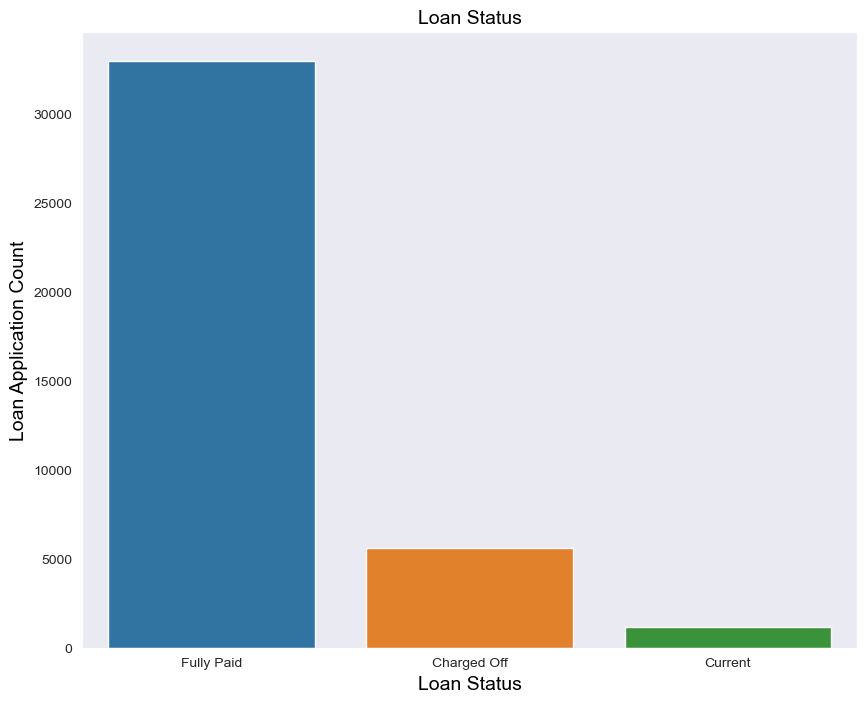

In [16]:
plt.figure(figsize=(10,8),facecolor='w')
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=data)
ax.set_title('Loan Status',fontsize=14,color='black')
ax.set_xlabel('Loan Status',fontsize=14,color = 'black')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'black')            

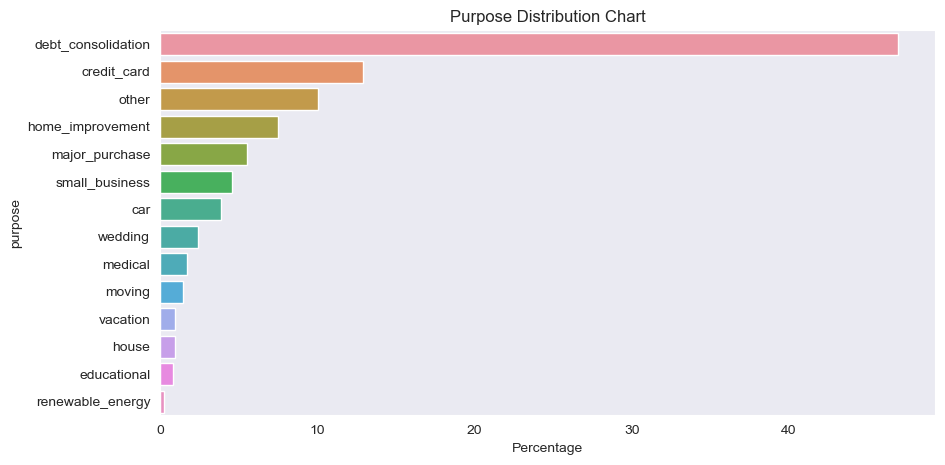

purpose
debt_consolidation   46.93
credit_card          12.92
other                10.05
home_improvement      7.49
major_purchase        5.51
small_business        4.60
car                   3.90
wedding               2.38
medical               1.74
moving                1.47
vacation              0.96
house                 0.96
educational           0.82
renewable_energy      0.26
Name: count, dtype: float64


In [17]:
# Find the purpose of loan in total loans issued
pur_loan = (data.purpose.value_counts()*100)/len(data)

# Convert the Series to a DataFrame for easier plotting
pur_loan_df = pur_loan.reset_index(name='percentage')

# Use Seaborn to create a horizontal bar plot
plt.figure(figsize=(10, 5))
sns.set_palette('pastel')  # Set color palette
sns.barplot(x='percentage', y='purpose', data=pur_loan_df, errorbar=None)
plt.title('Purpose Distribution Chart')
plt.xlabel('Percentage')
plt.show()

print(pur_loan)
# Observations
# Most of the loans taken for debt consolidation(47%) 
# Second one is Credit card bill payment (13%)


#### Univariate Analysis - Loan amount

count   39,717.00
mean    11,219.44
std      7,456.67
min        500.00
25%      5,500.00
50%     10,000.00
75%     15,000.00
max     35,000.00
Name: loan_amnt, dtype: float64


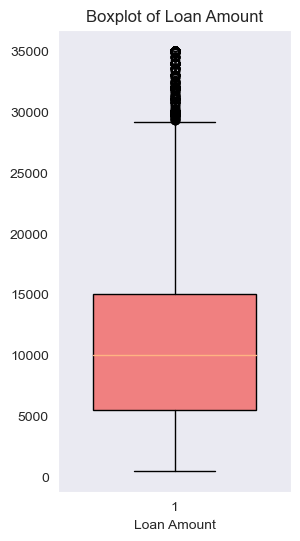

In [18]:
# Basic statistics of Loan amount - Quantitative Variables
# Print descriptive statistics for 'loan_amnt'
print(data['loan_amnt'].describe())

# Create a box chart (boxplot) using Matplotlib
plt.figure(figsize=(3, 6))
box_plot = plt.boxplot(data['loan_amnt'], vert=True, patch_artist=True, widths=0.7, boxprops=dict(facecolor='lightcoral'))
plt.title('Boxplot of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()

# Observation : Below plots show that most of the Loan amounts are in range of 5000 - 15000.

#### Univariate Analysis - Interest Rate

count   39,717.00
mean        12.02
std          3.72
min          5.42
25%          9.25
50%         11.86
75%         14.59
max         24.59
Name: int_rate, dtype: float64


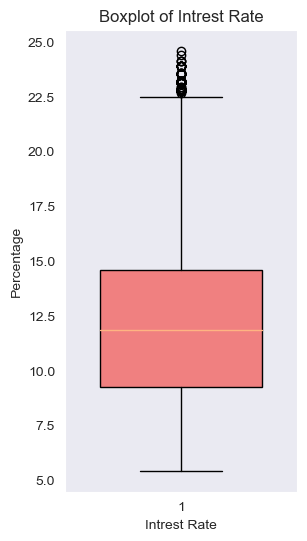

In [19]:
# Basic statistics of Interest rate - Quantitative Variables
# Print descriptive statistics for 'Interest rate'
print(data['int_rate'].describe())

# Create a box chart (boxplot) using Matplotlib
plt.figure(figsize=(3, 6))
box_plot = plt.boxplot(data['int_rate'], vert=True, patch_artist=True, widths=0.7, boxprops=dict(facecolor='lightcoral'))
plt.title('Boxplot of Intrest Rate')
plt.xlabel('Intrest Rate')
plt.ylabel("Percentage")
plt.show()

# Observation : Most of the loan interest rate are in range of 9 % - 14.5 %

#### Univariate Analysis - Annual Income 

count      39,717.00
mean       68,968.93
std        63,793.77
min         4,000.00
25%        40,404.00
50%        59,000.00
75%        82,300.00
max     6,000,000.00
Name: annual_inc, dtype: float64


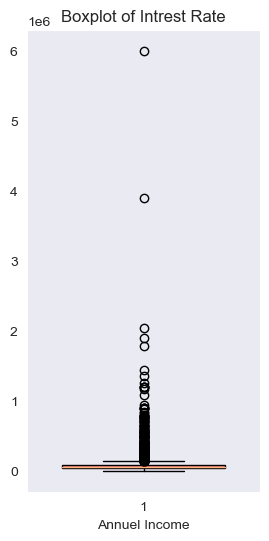

In [20]:
# Basic statistics of Annual Income - Quantitative Variables
# Print descriptive statistics for 'Annual income'
print(data['annual_inc'].describe())

# Create a box chart (boxplot) using Matplotlib
plt.figure(figsize=(3, 6))
box_plot = plt.boxplot(data['annual_inc'], vert=True, patch_artist=True, widths=0.7, boxprops=dict(facecolor='lightcoral'))
plt.title('Boxplot of Intrest Rate')
plt.xlabel('Annuel Income')
plt.show()

# Observation : Most of the borrower's Annual incomes are in range of 40000- 82000

#### Derive Columns For Analysis - Year and Month

In [21]:
# Derive the month and year columns
data.issue_d = pd.to_datetime(data.issue_d, format='%b-%y')
data['year']=data['issue_d'].dt.year
data['month']=data['issue_d'].dt.month
data.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,year,month
0,5000,5000,"4,975.00",36 months,10.65,162.87,B,B2,10,RENT,"24,000.00",Verified,2011-12-01,Fully Paid,credit_card,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,2011,12
1,2500,2500,"2,500.00",60 months,15.27,59.83,C,C4,1,RENT,"30,000.00",Source Verified,2011-12-01,Charged Off,car,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,2011,12
2,2400,2400,"2,400.00",36 months,15.96,84.33,C,C5,10,RENT,"12,252.00",Not Verified,2011-12-01,Fully Paid,small_business,8.72,0,Nov-01,2,2,0,2956,98.50,10,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,2011,12
3,10000,10000,"10,000.00",36 months,13.49,339.31,C,C1,10,RENT,"49,200.00",Source Verified,2011-12-01,Fully Paid,other,20.00,0,Feb-96,1,10,0,5598,21,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,Apr-16,2011,12
4,3000,3000,"3,000.00",60 months,12.69,67.79,B,B5,1,RENT,"80,000.00",Source Verified,2011-12-01,Current,other,17.94,0,Jan-96,0,15,0,27783,53.90,38,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,May-16,2011,12


#### Univariate Analysis - Loan approved rate per year

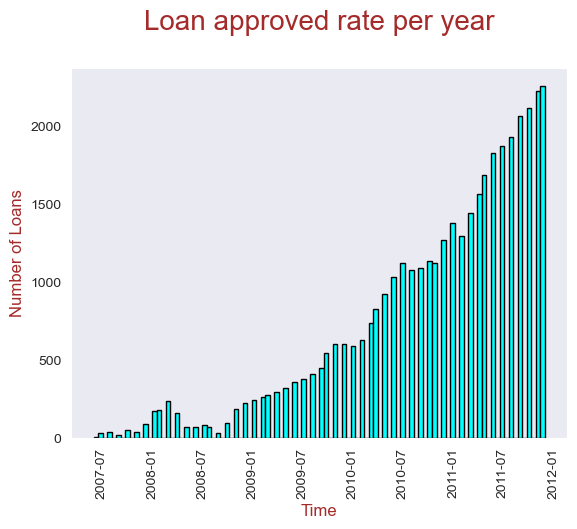

In [31]:
 # Number of loans which were approved every year/month
plt.hist(data.issue_d, bins = 100,edgecolor='black',color='cyan')
plt.xticks(rotation=90)
# Labeling Axes
plt.title("Loan approved rate per year\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("Time", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Number of Loans", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'} )
plt.show()

# Observation : Number of loan application is increasing every year.

### Bivariate Analysis

#### Derived column

In [23]:
# Derived columns
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
data['loan_amnt_cats'] = pd.cut(data['loan_amnt'], [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000], labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '300000-35000', '35000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
data['annual_inc_cats'] = pd.cut(data['annual_inc'], [0, 20000, 40000, 60000, 80000, 1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
data['int_rate_cats'] = pd.cut(data['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
data['dti_cats'] = pd.cut(data['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

data.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,year,month,loan_amnt_cats,annual_inc_cats,int_rate_cats,dti_cats
0,5000,5000,"4,975.00",36 months,10.65,162.87,B,B2,10,RENT,"24,000.00",Verified,2011-12-01,Fully Paid,credit_card,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,2011,12,0-5000,20000-40000,10-13,NaN
1,2500,2500,"2,500.00",60 months,15.27,59.83,C,C4,1,RENT,"30,000.00",Source Verified,2011-12-01,Charged Off,car,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,2011,12,0-5000,20000-40000,12.5-16,0-5
2,2400,2400,"2,400.00",36 months,15.96,84.33,C,C5,10,RENT,"12,252.00",Not Verified,2011-12-01,Fully Paid,small_business,8.72,0,Nov-01,2,2,0,2956,98.50,10,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,2011,12,0-5000,0-20000,12.5-16,05-10
3,10000,10000,"10,000.00",36 months,13.49,339.31,C,C1,10,RENT,"49,200.00",Source Verified,2011-12-01,Fully Paid,other,20.00,0,Feb-96,1,10,0,5598,21,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,Apr-16,2011,12,5000-10000,40000-60000,12.5-16,15-20
4,3000,3000,"3,000.00",60 months,12.69,67.79,B,B5,1,RENT,"80,000.00",Source Verified,2011-12-01,Current,other,17.94,0,Jan-96,0,15,0,27783,53.90,38,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,May-16,2011,12,0-5000,60000-80000,12.5-16,15-20


#### Bivariate Analysis - Annual income Vs Charged off

In [24]:
# Finding the relation between Annuel income and Charged off

inc_range_vs_loan = data.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Current'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.

loan_status,annual_inc_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,9,943,1189,0.20
1,20000-40000,1514,170,7004,8688,0.17
2,40000-60000,1729,345,9534,11608,0.15
3,60000-80000,1024,240,6597,7861,0.13
4,80000 +,1122,376,8859,10357,0.11


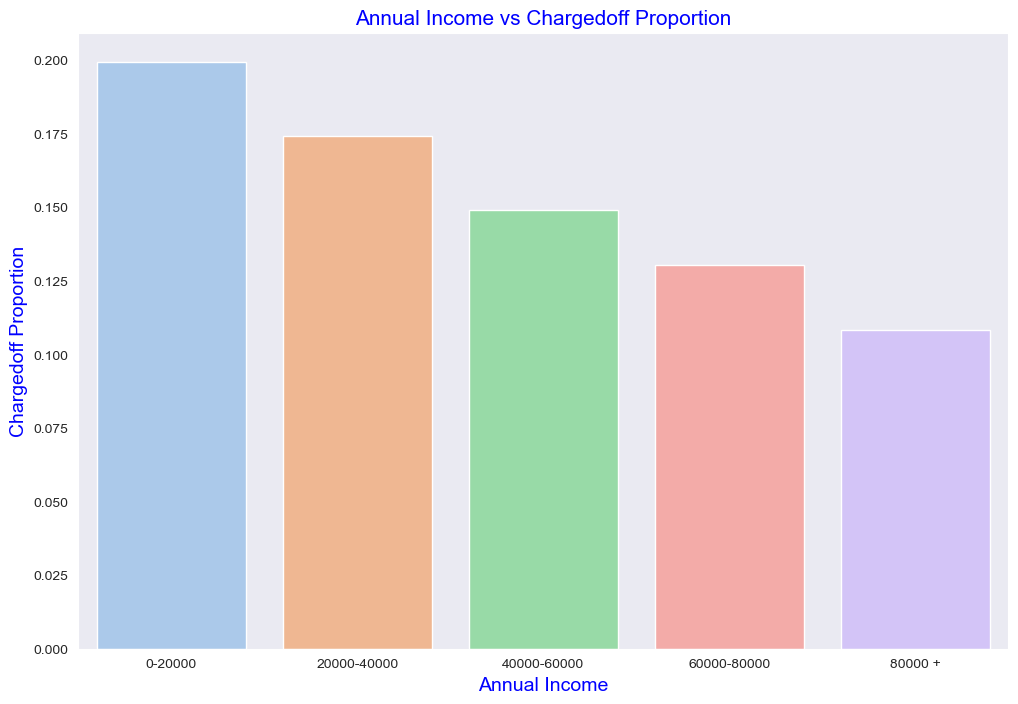

In [25]:


fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='w')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'b')
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'b')
ax1.set_xlabel('Annual Income',fontsize=14,color='b')
plt.show()

#### Bivariate Analysis - Purpose of Loan Vs Charged off

In [26]:
# Finding the relation between purpose of Loan against Chargedoff_Proportion.

purpose_vs_loan = data.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# small Business applicants have high chances of getting charged off.

loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
11,small_business,475.00,74.00,"1,279.00","1,828.00",0.26
10,renewable_energy,19.00,1.00,83.00,103.00,0.18
3,educational,56.00,0.00,269.00,325.00,0.17
9,other,633.00,128.00,"3,232.00","3,993.00",0.16
8,moving,92.00,7.00,484.00,583.00,0.16
5,house,59.00,14.00,308.00,381.00,0.15
7,medical,106.00,12.00,575.00,693.00,0.15
2,debt_consolidation,"2,767.00",586.00,"15,288.00","18,641.00",0.15
12,vacation,53.00,6.00,322.00,381.00,0.14
4,home_improvement,347.00,101.00,"2,528.00","2,976.00",0.12


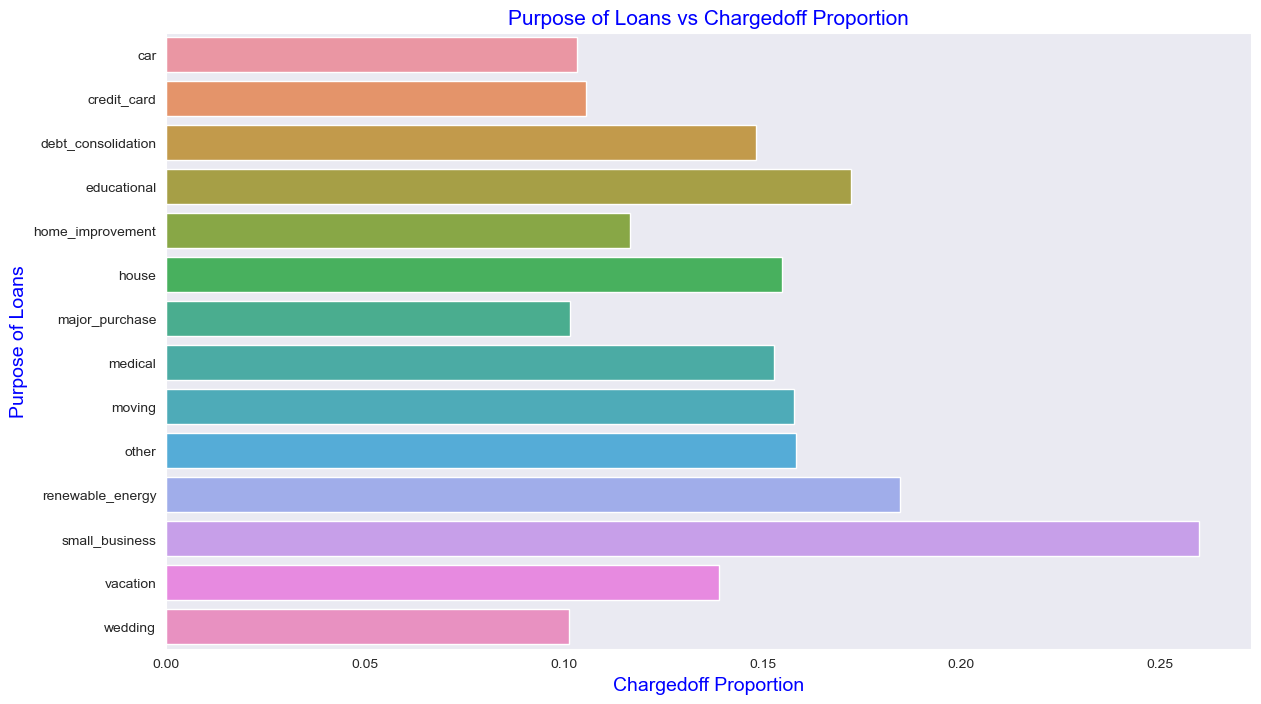

In [27]:
# Visualize the pattern to understand the data better.
# pairs of continuous variables.
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='w')
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15,color = 'b')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='b')
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'b')
plt.show()

#### Bivariate Analysis - Grade Vs Chargedoff

In [28]:
# Finding the relation between grade against Chargedoff_Proportion
grade_vs_loan = data.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged off is increasing with grade moving from "A" towards "G"

loan_status,grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
6,G,101,17,198,316,0.32
5,F,319,73,657,1049,0.30
4,E,715,179,1948,2842,0.25
3,D,1118,222,3967,5307,0.21
2,C,1347,264,6487,8098,0.17
1,B,1425,345,10250,12020,0.12
0,A,602,40,9443,10085,0.06


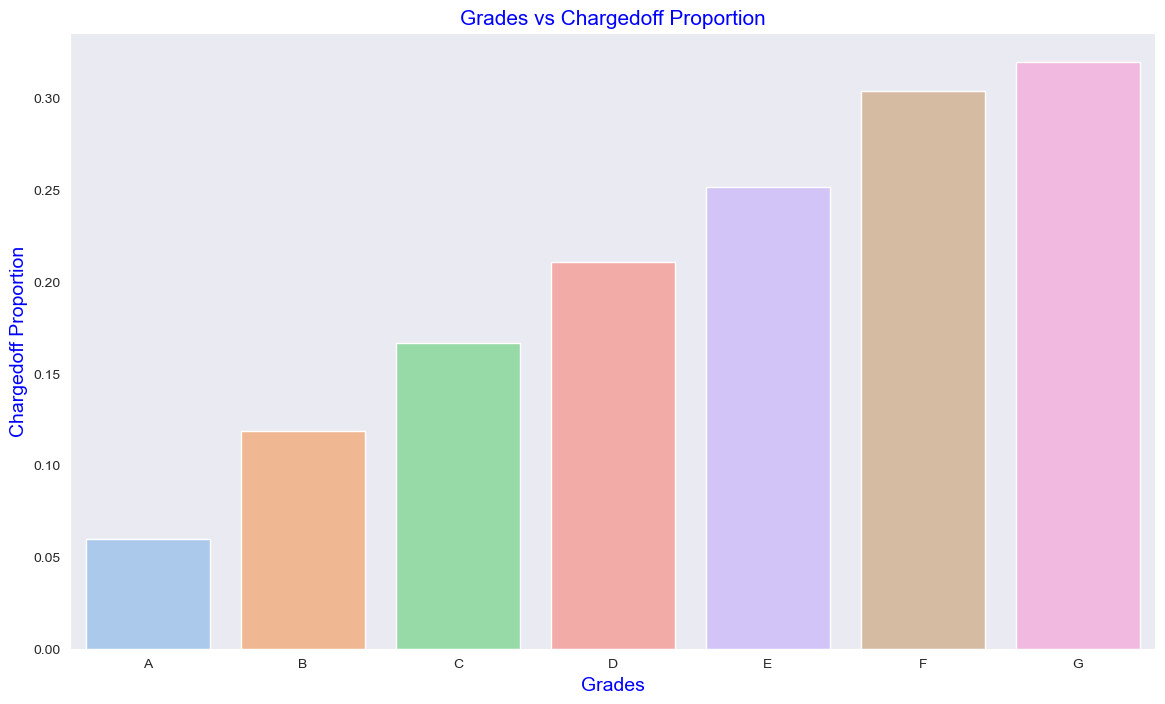

In [29]:
# Visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='w')
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15,color='b')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grades',fontsize=14,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color ='b')
plt.show()